In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [58]:
dataset=pd.read_csv("/content/placement-dataset.csv")
dataset

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [59]:
dataset.head(3)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0


In [60]:
dataset.drop(columns=['Unnamed: 0'], inplace=True)

In [61]:
dataset.rename(columns={'iq':'score'}, inplace=True)

In [62]:
dataset.isnull().sum()

cgpa         0
score        0
placement    0
dtype: int64

<Axes: xlabel='cgpa', ylabel='score'>

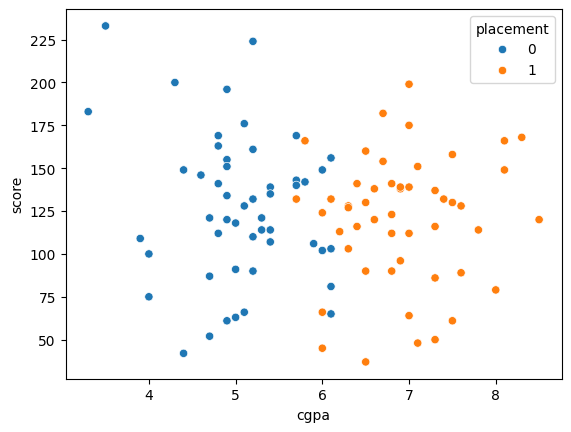

In [63]:

sns.scatterplot(data=dataset, x='cgpa', y='score', hue='placement')

In [64]:
x=dataset.iloc[:,:-1]
y=dataset['placement']

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

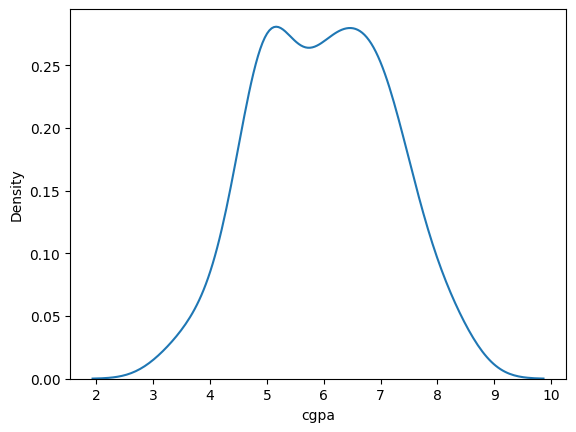

In [66]:
# check whethere it is normal distribution or not

sns.kdeplot(data=dataset['cgpa'])
plt.show()

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [68]:
gnb=GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [69]:
gnb.score(x_test, y_test)

0.85

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


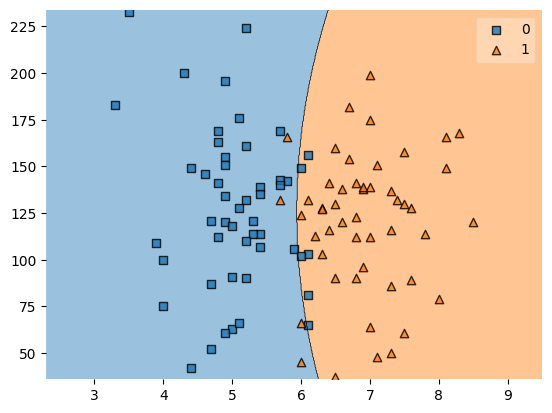

In [75]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=gnb)
plt.show()

In [70]:
mnb=MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [71]:
mnb.score(x_test, y_test)*100

95.0

In [72]:
bnb=BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [74]:
bnb.score(x_test, y_test)

0.5